# Spotify Songs  - Part 2: Genre classification with sklearn 

This is the second part of a project with a <a href="https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db/data#">dataset</a> from Spotify with 232,725 songs, with approximately 10,000 songs per genre. Part 1 explored and visualized the dataset and found that the different genres vary only little in some of the provided variables.

#### Variables
Genre: Genre of the song e.g. Rock, Rap, Electronic
Popularity: Score from 0 to 100
Tempo : Measured in Beats Per Minute <br>
Energy: The energy of a song - the higher the value, the more energtic.<br>
Danceability: The higher the value, the easier it is to dance to this song.<br>
Loudness..dB: The higher the value, the louder the song.<br>
Liveness: The higher the value, the more likely the song is a live recording.<br>
Valence: The higher the value, the more positive mood for the song.<br>
Duration_ms: The duration of the song.<br>
Acousticness:The higher the value the more acoustic the song is.<br>
Speechiness:The higher the value the more spoken word the song contains.<br>
Popularity:The higher the value the more popular the song is.<br>
key: The key the song was composed in e.g. F#, G, A#<br>
mode: The musical scale e.g. minor or major <br>


In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn import svm 
from sklearn.neural_network import MLPClassifier

In [90]:
df = pd.read_csv('SpotifyFeatures.csv', index_col = 'track_id')   
df.tail(2)

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
track_id,,,,,,,,,,,,,,,,,
6EFsue2YbIG4Qkq8Zr9Rir,Soul,R.LUM.R,With My Words,44,0.2620,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489
34XO9RwPMKjbvRry54QzWn,Soul,Mint Condition,You Don't Have To Hurt No More,35,0.0973,0.758,323027,0.470,0.000049,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479


In [91]:
# checking for duplicates and missing values  
test = df.duplicated().sum()
print('The number of duplicates is:',test)

test2 = df.isnull().sum()
print("Missing values by variable:")
print(test2)

The number of duplicates is: 0
Missing values by variable:
genre               0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


#### Dropping two genres
There are too few 'A capella' songs, and 'Children's Music' appeared twice with different spelling in the original dataset.

In [92]:
print('Number of genres:', df['genre'].nunique())
df = df[(df.genre != "A Capella") & (df.genre != "Children's Music")]

Number of genres: 27


In [93]:
print('Number of genres after dropping:', df['genre'].nunique())


Number of genres after dropping: 25


#### Transformation  
'mode'(Minor/Major) and 'time_signature' (3/4, 4/4 etc.) get transformed. 

In [94]:
df["mode"] = df["mode"].astype('category')
df['mode_codes'] = df['mode'].cat.codes

df["time_signature"] = df["time_signature"].astype('category')
df['time_signature_codes'] = df['time_signature'].cat.codes

df["key"] = df["key"].astype('category')
df['key_codes'] = df['key'].cat.codes

#df = pd.get_dummies(df, columns=['key'])   

In [95]:
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,mode_codes,time_signature_codes,key_codes
track_id,,,,,,,,,,,,,,,,,,,,
0BRjO6ga9RKCKjfDqeFgWV,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0,3,4
0BjC1NfoEOOusryehmNudP,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,1,3,9
0CoSDzoNIKCRs124s9uTVy,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,1,4,3
0Gc6TVm52BwZD07Ki6tIvf,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0,3,4
0IuslXpMROHdEPvSl1fTQK,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,0,3,8


#### Splitting the data

In [97]:
Y_df = df['genre']

X_df = df.drop(['genre','artist_name','track_name','mode','key','time_signature','duration_ms'], axis=1) 


scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_df)
X_df = scaling.transform(X_df)
print(pd.DataFrame(X_df).head(2))

      0         1         2         3    4         5         6         7  \
0 -1.00  0.226908 -0.285883  0.821818 -1.0 -0.320772  0.801712 -0.935859   
1 -0.98 -0.506024  0.146328  0.475465 -1.0 -0.714580  0.668938 -0.863251   

          8      9   10   11        12  
0  0.285408  0.628 -1.0  0.5 -0.272727  
1  0.351603  0.632  1.0  0.5  0.636364  


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.20, random_state=0)

### Random Forest 

In [10]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50,100,200,400,600]

criterion = ['gini', 'entropy']
max_depth = [10,25,50,75,100]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

### kudso to Will Koehrsen 
### https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [11]:
rf = RandomForestClassifier()

In [12]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 10, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  7.2min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 25, 50, 75, 100],
                                        'n_estimators': [50, 100, 200, 400,
                                                         600]},
                   random_state=0, verbose=2)

In [13]:
rf_random.best_params_


{'n_estimators': 100,
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': True}

In [14]:
rf = RandomForestClassifier(n_estimators = 100, n_jobs=-1, criterion = 'entropy',max_depth = 10)

In [15]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1)

In [16]:
rf_pred = rf.predict(x_test)

In [17]:
print(classification_report(y_test,rf_pred))

                  precision    recall  f1-score   support

     Alternative       0.28      0.17      0.21      1808
           Anime       0.61      0.36      0.45      1814
           Blues       0.41      0.31      0.35      1845
Children’s Music       0.24      0.19      0.21      1846
       Classical       0.59      0.59      0.59      1841
          Comedy       0.98      0.93      0.95      1881
         Country       0.35      0.37      0.36      1740
           Dance       0.18      0.10      0.13      1758
      Electronic       0.48      0.54      0.51      1852
            Folk       0.24      0.36      0.29      1810
         Hip-Hop       0.25      0.48      0.33      1844
           Indie       0.20      0.14      0.16      1878
            Jazz       0.39      0.31      0.35      1947
           Movie       0.65      0.57      0.61      1561
           Opera       0.70      0.88      0.78      1696
             Pop       0.28      0.43      0.34      1949
             

### AdaBoost

In [18]:
ada = AdaBoostClassifier(n_estimators=10,base_estimator=rf, random_state=0) 

In [19]:
ada.fit(x_train,y_train)


AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         max_depth=10,
                                                         n_jobs=-1),
                   n_estimators=10, random_state=0)

In [20]:
ada_pred = ada.predict(x_test)
print(classification_report(y_test,ada_pred))

                  precision    recall  f1-score   support

     Alternative       0.27      0.19      0.22      1808
           Anime       0.59      0.48      0.53      1814
           Blues       0.41      0.42      0.41      1845
Children’s Music       0.20      0.15      0.17      1846
       Classical       0.64      0.45      0.53      1841
          Comedy       0.98      0.93      0.95      1881
         Country       0.38      0.38      0.38      1740
           Dance       0.19      0.20      0.20      1758
      Electronic       0.52      0.55      0.54      1852
            Folk       0.22      0.31      0.26      1810
         Hip-Hop       0.30      0.35      0.32      1844
           Indie       0.14      0.14      0.14      1878
            Jazz       0.38      0.38      0.38      1947
           Movie       0.60      0.65      0.63      1561
           Opera       0.76      0.77      0.77      1696
             Pop       0.30      0.16      0.21      1949
             

#### Precision: What proportion of positive identifications was actually correct?  TP / TP + FP
#### Recall: What proportion of actual positives was identified correctly? TP / TP + FN









### Neural Network

In [103]:
random_grid_mlp = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,100,100), (100,200,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant','adaptive'],
}

In [104]:
mlp = MLPClassifier()

In [105]:
mlp_random = RandomizedSearchCV(estimator = mlp, param_distributions = random_grid_mlp, 
                               n_iter = 10, cv = 3, random_state=0, n_jobs = -1)

In [106]:
mlp_random.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100, 100, 100),
                                                               (100, 200, 100)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['adam', 'sgd']},
                   random_state=0)

In [107]:
mlp_random.best_params_

{'solver': 'adam',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (50, 50, 50),
 'activation': 'tanh'}

In [27]:
nn = MLPClassifier(hidden_layer_sizes=(50,50,50),activation = 'tanh
                   ',max_iter=100)

In [28]:
nn.fit(x_train,y_train)
nn_pred = nn.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
print(classification_report(y_test,nn_pred))

                  precision    recall  f1-score   support

     Alternative       0.30      0.20      0.24      1808
           Anime       0.61      0.55      0.58      1814
           Blues       0.43      0.34      0.38      1845
Children’s Music       0.27      0.14      0.18      1846
       Classical       0.58      0.60      0.59      1841
          Comedy       0.97      0.94      0.95      1881
         Country       0.36      0.43      0.39      1740
           Dance       0.21      0.17      0.19      1758
      Electronic       0.57      0.52      0.54      1852
            Folk       0.26      0.36      0.30      1810
         Hip-Hop       0.31      0.31      0.31      1844
           Indie       0.21      0.14      0.17      1878
            Jazz       0.39      0.43      0.41      1947
           Movie       0.73      0.56      0.63      1561
           Opera       0.76      0.83      0.80      1696
             Pop       0.30      0.43      0.35      1949
             

### Why is the performance so poor? 

We see that genres that the models performed best for genres that are easy to distinguish from others, such as 'comedy' or 'opera'. However, almost all other genres (25 in total) aren't as easily distinguishable from each other with the given variables. Let's visualize the mean value of each genre across all variables, and see if the problem discovered in Part 1 extends to more variables. For that we need to get tempo and the code variables on a scale from 0 to 1 like most other variables already are.

In [56]:
df2 = df 
df2.reset_index(level=0, inplace=True)

scaler = MinMaxScaler()

df2[['popularity','time_signature_codes','key_codes','tempo','loudness']] = scaler.fit_transform(df2[['popularity','time_signature_codes','key_codes','tempo','loudness']])
df2 = df2.drop(['track_id','artist_name','track_name','duration_ms','key','mode','time_signature'], axis = 1)

In [57]:
df3 = df2.groupby(['genre']).mean()
df3.reset_index(level=0, inplace=True)

In [58]:
df3 = pd.melt(df3, "genre", var_name="measurement")

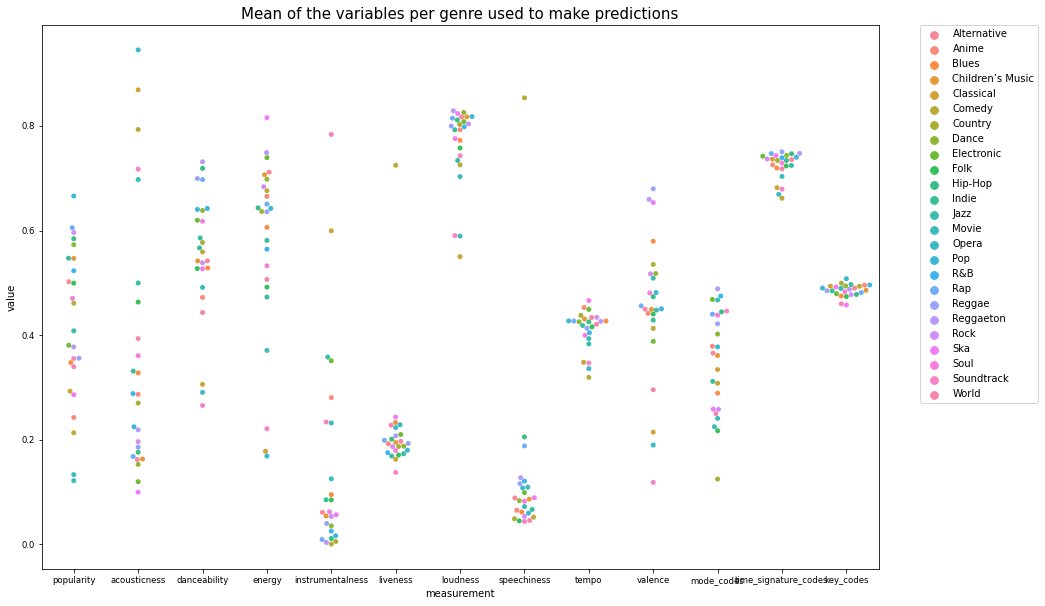

In [59]:
f, ax = plt.subplots(figsize=(15, 10))
ax.tick_params(labelsize = 8.5)
ax.set_title('Mean of the variables per genre used to make predictions', fontsize = 15)
sns.swarmplot(x="measurement", y="value", hue="genre",data=df3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   genre        325 non-null    object 
 1   measurement  325 non-null    object 
 2   value        325 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.7+ KB


### Narrowing it down 
#### Let's see if we can get a better result by reducing the df to hanfull of genres. First, let's visualize this smaller sample again. 

In [67]:
df_genres = df3.loc[(df3['genre'] == 'Rock') | (df3['genre'] == 'Electronic') | (df3['genre'] == 'Opera') 
        | (df3['genre'] == 'Classical') | (df3['genre'] == 'Rap')]

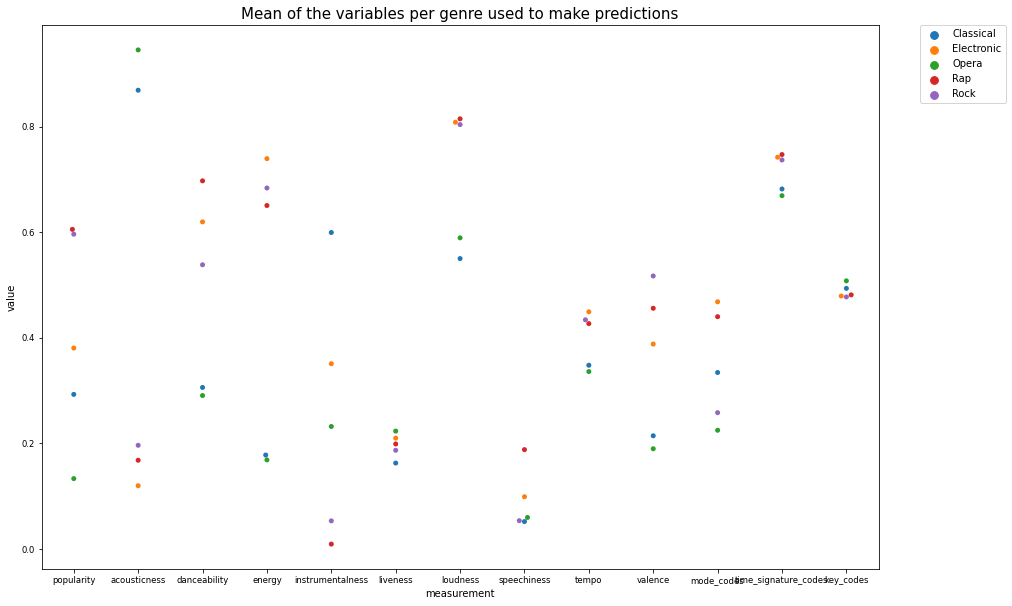

In [68]:
f, ax = plt.subplots(figsize=(15, 10))
ax.tick_params(labelsize = 8.5)
ax.set_title('Mean of the variables per genre used to make predictions', fontsize = 15)
sns.swarmplot(x="measurement", y="value", hue="genre",data=df4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [78]:
df_few = df.loc[(df['genre'] == 'Rock') | (df['genre'] == 'Electronic') | (df['genre'] == 'Opera') 
        | (df['genre'] == 'Classical') | (df['genre'] == 'Rap')]

In [79]:
df_few['genre'].value_counts()

Electronic    9377
Rock          9272
Classical     9256
Rap           9232
Opera         8280
Name: genre, dtype: int64

In [83]:
Y_df = df_few['genre']

X_df = df_few.drop(['genre','artist_name','track_name','mode','key','time_signature','duration_ms'], axis=1) 


scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_df)
X_df = scaling.transform(X_df)
print(pd.DataFrame(X_df).head(2))

          0         1         2         3         4         5         6  \
0  0.939394 -0.692773  0.685616  0.597589 -0.999993 -0.899190  0.764517   
1  0.656566 -0.845183  0.278639  0.427416 -0.999979 -0.732794  0.719584   

          7         8         9   10   11        12  
0 -0.546233 -0.389912  0.191532  1.0  0.5 -0.272727  
1 -0.968373 -0.349682 -0.693548 -1.0  0.5  1.000000  


In [85]:
x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.20, random_state=0)

In [86]:
rf = RandomForestClassifier(n_estimators = 100, n_jobs=-1, criterion = 'entropy',max_depth = 10)

In [87]:
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [88]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

   Classical       0.89      0.83      0.86      1833
  Electronic       0.90      0.89      0.89      1876
       Opera       0.91      0.91      0.91      1683
         Rap       0.87      0.83      0.85      1795
        Rock       0.79      0.89      0.84      1897

    accuracy                           0.87      9084
   macro avg       0.87      0.87      0.87      9084
weighted avg       0.87      0.87      0.87      9084



#### Narrowing it down to five genres that to human ears clearly are distinct from each other, helped improving the performance of the classifier. 